[Regression vs Classification (Continue vs Discret)](https://www.geeksforgeeks.org/ml-classification-vs-regression/)

[SKLearn Linear model](https://scikit-learn.org/stable/modules/linear_model.html) ; [Principe d'erreur quadratique](https://openclassrooms.com/fr/courses/4011851-initiez-vous-au-machine-learning/4120981-construisez-un-modele-statistique#/id/r-4120990)

Méthodes de régression : [Moindres carrés ordinaires](https://openclassrooms.com/fr/courses/4525326-realisez-des-modelisations-de-donnees-performantes/5754171-appliquez-la-methode-des-moindres-carres-ordinaires) ; [Descente de gradients](https://developers.google.com/machine-learning/crash-course/reducing-loss/gradient-descent)

[Coef de détermination](https://fr.khanacademy.org/math/be-5eme-secondaire2h2/x741278364a599ec1:statistiques/x741278364a599ec1:coefficient-de-determination/a/r-squared-intuition); [Wiki](https://fr.wikipedia.org/wiki/Coefficient_de_d%C3%A9termination)

[Under/Overfitting](https://mrmint.fr/overfitting-et-underfitting-quand-vos-algorithmes-de-machine-learning-derapent)


Motivation à utiliser l'erreur quadratique :
(La ligne valide est celle du milieu, car minimisant l'erreur quadratique. Je te laisse chercher pourquoi, mon bezeau. C'est niveau collège...)
<img src="Info. E abs & E quadra.png">

prediction (1): [1091.15672308]
slope (a): [938.23786125]
intercept (b): 152.91886182616167
r² - Train (1 is best): 0.3351312506867542
r² - Test: 0.4725754479822712


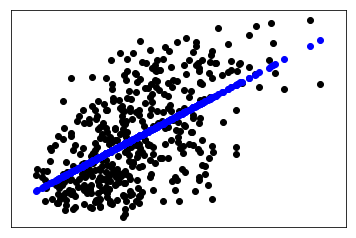

In [56]:
#print(__doc__)
%matplotlib inline
# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_train)


"""
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))
"""


print 'prediction (1):', regr.predict([[1]])
print 'slope (a):', regr.coef_
print 'intercept (b):', regr.intercept_

print 'r² - Train (1 is best):', regr.score(diabetes_X_train, diabetes_y_train)
print 'r² - Test:', regr.score(diabetes_X_test, diabetes_y_test)
#Ratio pred/moy. (r²) du test est meilleur que celui du train
# --> Underfitting
# --> Nature même des Moindres Carrès : Plus il y a de valeurs, plus il y a d'erreurs potentielles, amplifiées
#     Par la moyenne quadratique


# Plot outputs
plt.scatter(diabetes_X_train, diabetes_y_train,  color='black')
plt.scatter(diabetes_X_train, diabetes_y_pred, color='blue')

plt.xticks(())
plt.yticks(())

plt.show()

[5.44814029]
-102360.54329388007
0.04550919269952436
-1.484992417368511
[2.27410114]


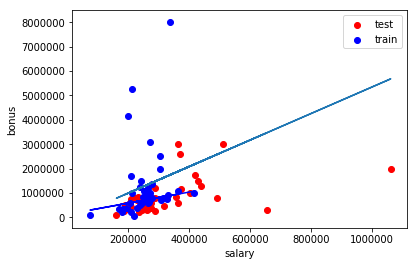

In [76]:
"""
    Starter code for the regression mini-project.
    
    Loads up/formats a modified version of the dataset
    (why modified?  we've removed some trouble points
    that you'll find yourself in the outliers mini-project).

    Draws a little scatterplot of the training/testing data

    You fill in the regression code where indicated:
"""    

%matplotlib inline

import sys
import pickle
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load(open("../final_project/final_project_dataset_modified.pkl", "r") )


### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "salary"]
#features_list = ["bonus", "long_term_incentive"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )


### training-testing split needed in regression, just like classification
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features,\
                                                                          target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"


### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and 
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.

from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(feature_train, target_train)
#reg.fit(feature_test, target_test)

print reg.coef_
print reg.intercept_
print reg.score(feature_train, target_train)
    #Avec 'salary' : Score minable
    #Avec 'long_term_incentive' : C'est mieux
print reg.score(feature_test, target_test)
    #Avec 'salary' : Score absurde (Droite de rég. inutile pour ces données)
    #Avec 'long_term_incentive' : C'est mieux mais c'est franchement pas ouf...


### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")


### draw the regression line, once it's coded
try:
    plt.plot(feature_test, reg.predict(feature_test))
except NameError:
    pass

reg.fit(feature_test, target_test)
print reg.coef_
plt.plot(feature_train, reg.predict(feature_train), color="b") 
#On recontruit une droite de rég. excluant l'outlier avec un salaire >1M$
#Résultant un coef. directeur de droite plus 2 fois inférieur à l'originel
# --> Attention aux outliers

plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()
